In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class EA(object):
    def __init__(self, obj_fun, pop_size, std=0.1):
        self.obj_fun = obj_fun
        self.pop_size = pop_size
        self.std = std
    
    def fitness(self, x):
        return self.obj_fun(x)
    
    def mutation(self, x, std=0.1):
        return x + np.random.randn(x.shape[0], x.shape[1]) * std
    
    def recombination(self, x):
        return x
    
    def selection(self, x_old, f_old, x, f):
        x_cat = np.concatenate([x, x_old], 0)
        f_cat = np.concatenate([f, f_old])
        ind = np.argsort(f_cat)
        x = x_cat[ind]
        f = f_cat[ind]
        return x[:self.pop_size], f[:self.pop_size]
    
    def step(self, x_old, f_old):
        x = self.recombination(x_old)
        x = self.mutation(x, std=self.std)
        f = self.fitness(x)
        x, f = self.selection(x_old, f_old, x, f)
        
        return x, f

In [3]:
def obj_fun(x):
    return x[:,0]**2. + x[:,1]**2

In [4]:
pop_size = 20
generations = 8
std = 0.5

In [5]:
ea = EA(obj_fun, pop_size=pop_size, std=std)

In [6]:
x = 4. * (2.*np.random.rand(pop_size,2) - 1.)
f = obj_fun(x)

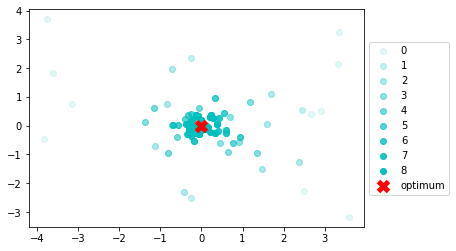

In [7]:
optimum = np.asarray([0., 0.])
for i in range(generations):
    plt.scatter(x[:,0], x[:,1], c='c', alpha=(i+1.)/(generations+1.), label=i)
    x, f = ea.step(x, f)
i+=1
plt.scatter(x[:,0], x[:,1], c='c', alpha=(i+1.)/(generations+1.), label=i)
plt.scatter(optimum[0], optimum[1], c='r', marker='x', s=100, linewidths=5, label='optimum')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))